| **Inicio** | **atrás 19** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./19_Precision_Accuracy_Recall_F1.ipynb)|

# **20. ¿Qué tan buenos son tus Clusters? Métricas para Clustering con Python: Silueta y Davies Bouldin**

## **Introducción**

Las métricas de evaluación son herramientas importantes para medir la calidad de los clusters generados por algoritmos de clustering. Dos métricas comunes para evaluar clusters son la Silueta (Silhouette) y el índice de Davies-Bouldin (Davies-Bouldin index). Ambas métricas buscan cuantificar cuán cohesivos y separados están los clusters en relación con la distribución de los datos. A continuación, se explica cada una de estas métricas con ejemplos y gráficos utilizando Python.

### Silueta (Silhouette):

La métrica de Silueta es una medida que cuantifica cuán cerca está cada muestra de su propio cluster en comparación con otros clusters. Los valores de silueta oscilan entre -1 y 1, donde un valor alto indica que la muestra está bien asignada a su cluster y mal asignada a otros clusters.

Para calcular la Silueta, se sigue el siguiente proceso:

1. Para cada muestra `i`, se calcula `a(i)`, la distancia promedio entre `i` y todas las demás muestras en el mismo cluster.
2. Para cada muestra `i`, se calcula `b(i)`, la distancia promedio entre `i` y todas las muestras en el cluster más cercano diferente al que pertenece `i`.
3. El valor de silueta para la muestra `i` se calcula como `(b(i) - a(i)) / max(a(i), b(i))`.

En general, cuanto mayor sea el valor de silueta, mejor será la calidad del clustering.



Puntaje de Silueta promedio: 0.79


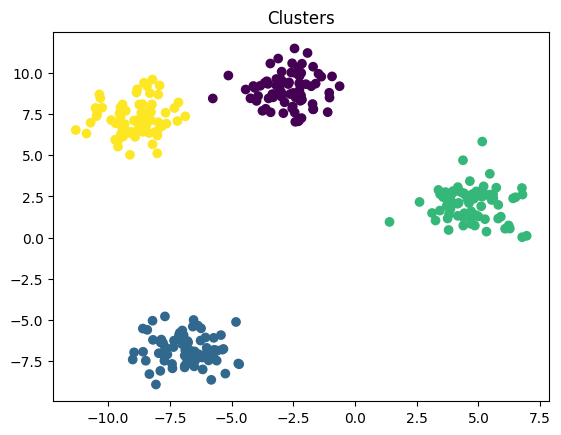

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Crear un modelo K-Means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

# Calcular la silueta para los clusters
silhouette_avg = silhouette_score(X, labels)
print(f"Puntaje de Silueta promedio: {silhouette_avg:.2f}")

# Visualizar los clusters y la silueta
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Clusters")
plt.show()



### Índice de Davies-Bouldin (Davies-Bouldin index):

El índice de Davies-Bouldin mide la "dispersión relativa" entre los clusters. Cuanto menor sea el índice, mejor será la calidad del clustering. Se calcula de la siguiente manera:

1. Para cada cluster `i`, se calcula `R(i)`, la distancia promedio entre el centroide del cluster `i` y todas las muestras en ese cluster.
2. Para cada cluster `i`, se calcula `S(i)`, la distancia promedio entre el centroide del cluster `i` y el centroide del cluster más cercano a `i`.
3. El índice de Davies-Bouldin se calcula como la suma de `(R(i) + R(j)) / S(i)` para todos los pares de clusters diferentes.





Estas métricas te permiten evaluar la calidad de tus clusters y tomar decisiones informadas sobre qué algoritmo de clustering y parámetros utilizar en función de cómo se desempeñan en tu conjunto de datos específico.

## **Cohesión de un cluster**

La cohesión de un clúster es una métrica que mide cuán cerca están los puntos dentro del mismo clúster. Una cohesión alta indica que los puntos dentro del clúster son similares entre sí y están agrupados de manera compacta. Por otro lado, una cohesión baja sugiere que los puntos en el clúster son dispersos y no tienen una similitud significativa.

Para calcular la cohesión de un clúster, normalmente se utiliza una medida de distancia entre los puntos y el centroide del clúster. Una forma común de calcularla es utilizando la distancia euclidiana.

A continuación, te mostraré cómo calcular la cohesión de un clúster utilizando un ejemplo simple con datos en Python:

In [4]:
import numpy as np

# Generar datos de ejemplo
np.random.seed(0)
cluster_data = np.random.rand(10, 2)

# Calcular el centroide del clúster
centroid = np.mean(cluster_data, axis=0)

# Calcular las distancias entre los puntos y el centroide
distances = np.linalg.norm(cluster_data - centroid, axis=1)

# Calcular la cohesión promedio
cohesion = np.mean(distances)

print("Datos del clúster:")
print(cluster_data)
print("Centroide:", centroid)
print("Distancias:", distances)
print("Cohesión:", cohesion)

Datos del clúster:
[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]]
Centroide: [0.52056625 0.6425434 ]
Distancias: [0.07794449 0.12764751 0.09696935 0.26268025 0.51329164 0.29401202
 0.28700753 0.71453636 0.53523548 0.34364938]
Cohesión: 0.3252974027968601


En este ejemplo, estamos generando 10 puntos aleatorios en un espacio bidimensional. Calculamos el centroide del clúster como la media de todos los puntos. Luego, calculamos las distancias euclidianas entre cada punto y el centroide. Finalmente, la cohesión se calcula tomando el promedio de estas distancias.

Este es un ejemplo muy simple, pero en problemas reales, los datos tendrán más dimensiones y el cálculo de la cohesión puede ser más complejo. La cohesión es una métrica útil para evaluar la calidad de los clústeres en algoritmos de clustering y puede ayudar a tomar decisiones sobre el número adecuado de clústeres y la interpretación de los resultados.

## **Distancia o Separación entre clusters**

La distancia o separación entre clústeres es una métrica que mide cuán distantes están los diferentes clústeres en un espacio de características. Esta métrica es importante para evaluar la calidad de los resultados de clustering, ya que clústeres bien separados indican una buena agrupación de los datos.

Una forma común de medir la distancia entre clústeres es utilizando la distancia euclidiana o cualquier otra medida de distancia. La distancia entre dos clústeres generalmente se calcula como la distancia entre sus centroides o como la distancia entre los puntos más cercanos de los dos clústeres.

Aquí tienes un ejemplo de cómo calcular la distancia entre clústeres en Python:

In [5]:
import numpy as np
from scipy.spatial.distance import euclidean

# Generar dos clústeres de ejemplo
cluster1 = np.array([[1, 2], [2, 3], [3, 4]])
cluster2 = np.array([[6, 7], [7, 8], [8, 9]])

# Calcular los centroides de los clústeres
centroid1 = np.mean(cluster1, axis=0)
centroid2 = np.mean(cluster2, axis=0)

# Calcular la distancia euclidiana entre los centroides
distance = euclidean(centroid1, centroid2)

print("Cluster 1:", cluster1)
print("Cluster 2:", cluster2)
print("Centroide del Cluster 1:", centroid1)
print("Centroide del Cluster 2:", centroid2)
print("Distancia entre Clústeres:", distance)

Cluster 1: [[1 2]
 [2 3]
 [3 4]]
Cluster 2: [[6 7]
 [7 8]
 [8 9]]
Centroide del Cluster 1: [2. 3.]
Centroide del Cluster 2: [7. 8.]
Distancia entre Clústeres: 7.0710678118654755


En este ejemplo, hemos generado dos clústeres ficticios en un espacio bidimensional. Calculamos los centroides de ambos clústeres y luego calculamos la distancia euclidiana entre los dos centroides. Esta distancia puede ser utilizada para evaluar la separación entre los clústeres. Si la distancia entre clústeres es grande, indica que los clústeres están bien separados.

En problemas reales, los datos tendrán más dimensiones y los cálculos pueden ser más complejos. La distancia entre clústeres es útil para evaluar la calidad del clustering y puede influir en la elección del número adecuado de clústeres y en la interpretación de los resultados.

## **Coeficiente Silueta**

El coeficiente de silueta es una métrica utilizada para evaluar la calidad de un clustering. Esta métrica combina la cohesión (qué tan cerca están los puntos en un clúster) y la separación (qué tan lejos están los clústeres entre sí) para proporcionar una puntuación que varía entre -1 y 1. Un valor alto de coeficiente de silueta indica que los puntos dentro de un clúster están cerca entre sí y bien separados de otros clústeres, lo que sugiere una buena calidad del clustering.

El cálculo del coeficiente de silueta se basa en dos conceptos principales:

1. a(i): La distancia media entre el punto i y todos los demás puntos en el mismo clúster.
2. b(i): La distancia media entre el punto i y todos los puntos en el clúster más cercano que no contiene a i.

La fórmula para el coeficiente de silueta (s(i)) para un punto i es:

s(i) = (b(i) - a(i)) / max{a(i), b(i)}

Ahora, un valor de silueta cercano a 1 indica que el punto está bien ubicado dentro de su clúster y lejos de otros clústeres, mientras que un valor cercano a -1 indica que el punto podría estar mal ubicado en su clúster y debería estar en otro. Un valor cercano a 0 indica que el punto está cerca del límite entre dos clústeres.

A continuación, se muestra un ejemplo de cómo calcular y visualizar el coeficiente de silueta en Python:

Coeficiente de Silueta Promedio: 0.79


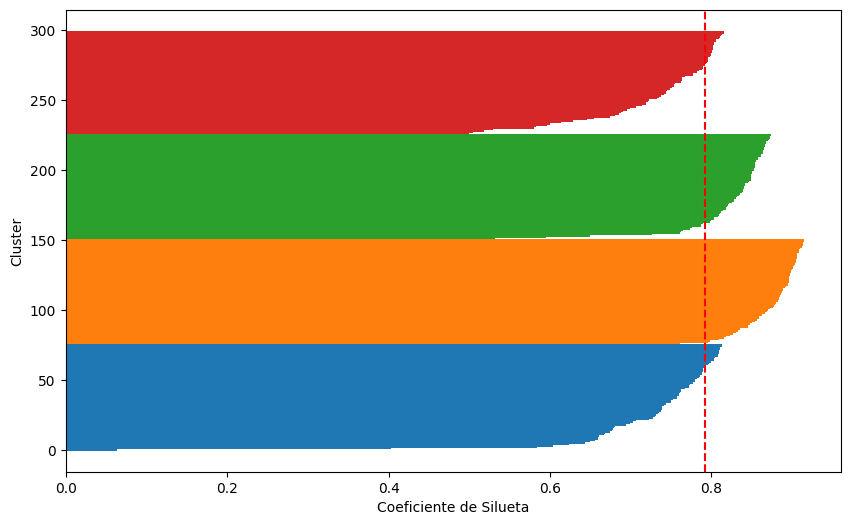

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Crear un modelo KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Calcular el coeficiente de silueta para cada punto
silhouette_vals = silhouette_samples(X, labels)

# Calcular el coeficiente de silueta promedio
silhouette_avg = np.mean(silhouette_vals)

print(f"Coeficiente de Silueta Promedio: {silhouette_avg:.2f}")

# Visualizar el coeficiente de silueta para cada punto
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(4):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Cluster")
plt.show()

En este ejemplo, estamos utilizando el conjunto de datos de ejemplo generado por `make_blobs` y aplicando el algoritmo KMeans con 4 clústeres. Luego, calculamos el coeficiente de silueta para cada punto utilizando `silhouette_samples` y el coeficiente de silueta promedio utilizando `silhouette_score`. Finalmente, visualizamos el coeficiente de silueta para cada clúster en forma de gráfico de barras, donde la línea roja vertical indica el valor promedio del coeficiente de silueta.

## **Índice Davies-Bouldin**

El índice Davies-Bouldin es una métrica utilizada para evaluar la calidad de los clusters generados por un algoritmo de clustering. Cuanto más bajo sea el valor del índice Davies-Bouldin, mejor será la calidad del clustering. Esta métrica se basa en la idea de medir la relación entre la dispersión dentro de un clúster y la separación entre clústeres.

La fórmula del índice Davies-Bouldin es la siguiente:

$DB = \frac{1}{N} \sum_{i=1}^{N} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)$

Donde:

- ( $N$ ) es el número de clústeres.
- ( $\sigma_i$ ) es la dispersión promedio dentro del clúster ( $i$ ).
- ( $d(c_i, c_j)$ ) es la distancia entre los centroides de los clústeres ( $i$ ) y ( $j$ ).

El índice Davies-Bouldin toma valores en el rango [0, +∞], y cuanto más bajo sea el valor, mejor será el clustering.

Aquí hay un ejemplo de cómo calcular el índice Davies-Bouldin utilizando la biblioteca Scikit-learn en Python:

In [9]:
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Crear un modelo KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Calcular el índice Davies-Bouldin
db_index = davies_bouldin_score(X, labels)
print(f"Índice Davies-Bouldin: {db_index:.2f}")

Índice Davies-Bouldin: 0.29


En este ejemplo, estamos generando datos de ejemplo utilizando `make_blobs`, luego aplicamos el algoritmo KMeans para agrupar los datos en 4 clústeres. Finalmente, calculamos y mostramos el valor del índice Davies-Bouldin para evaluar la calidad del clustering. Un valor más bajo indica un mejor clustering en términos de separación y cohesión de los clústeres.

## **Comparación de técnicas: K-Medias vs Propagación de Afinidad**

La comparación entre las técnicas de K-Medias y Propagación de Afinidad es esencial para comprender sus diferencias y determinar cuál es más adecuada para un conjunto de datos específico. Ambos algoritmos son métodos de clustering, pero se basan en enfoques diferentes. A continuación, te proporcionaré una explicación detallada junto con ejemplos y gráficos en código Python para comparar estas dos técnicas.

### K-Medias (K-Means)

El algoritmo K-Medias es uno de los métodos de clustering más conocidos y ampliamente utilizados. Funciona dividiendo los datos en k grupos (clusters) al asignar cada punto de datos al centroide más cercano. El proceso de optimización busca minimizar la suma de las distancias al cuadrado entre los puntos y los centroides de sus respectivos clusters.

#### Ejemplo de K-Medias

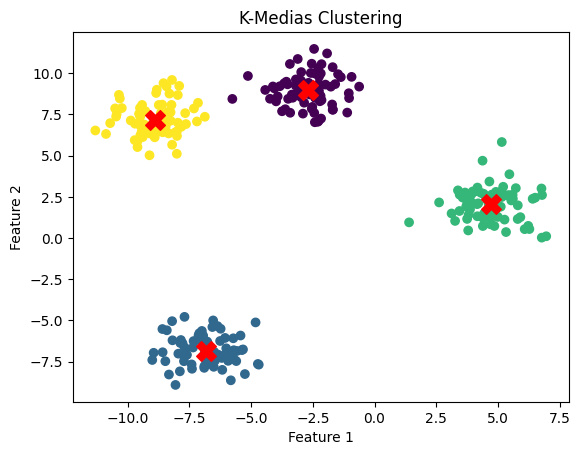

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Crear un modelo K-Medias
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

# Graficar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title("K-Medias Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Propagación de Afinidad

La Propagación de Afinidad es un método de clustering que no requiere especificar el número de clusters de antemano. En cambio, identifica automáticamente el número de clusters al asignar cada punto a un "exemplar" y luego propagar afinidades a través de los datos. Los puntos que son considerados "exemplares" son aquellos con las mayores afinidades dentro de un rango.

#### Ejemplo de Propagación de Afinidad

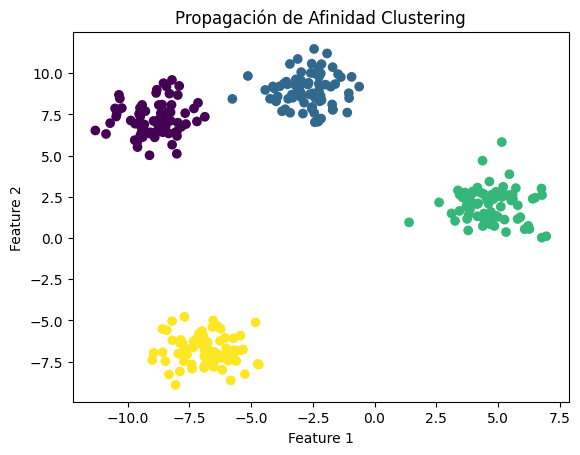

In [12]:
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

# Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Crear un modelo Propagación de Afinidad
affinity_propagation = AffinityPropagation(damping=0.5)
labels = affinity_propagation.fit_predict(X)

# Graficar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Propagación de Afinidad Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Comparación

Ambos algoritmos tienen ventajas y desventajas. K-Medias es más eficiente en grandes conjuntos de datos y es especialmente útil cuando se conoce el número de clusters. Por otro lado, Propagación de Afinidad es útil cuando no se conoce el número de clusters, pero puede ser más costoso en términos de tiempo de ejecución y memoria. La elección entre estos métodos depende del contexto y los requisitos específicos del problema.

La comparación de estas técnicas en un ejemplo real es importante para entender cómo se comportan en diferentes escenarios. Puedes experimentar con diferentes conjuntos de datos y parámetros para determinar cuál de estos métodos es más adecuado para tu caso.

## **Cómo determinar el mejor número de clusters (k) en K-Means**

Determinar el número óptimo de clusters, denotado como 'k', en el algoritmo K-Means es un proceso importante para garantizar un agrupamiento significativo y efectivo. Existen varios métodos para tomar esta decisión, y uno de los más comunes es el método del codo (Elbow Method). Este método busca encontrar el punto en el que la disminución en la suma de las distancias cuadradas intra-cluster (conocida como la inercia) se reduce significativamente, formando un "codo" en el gráfico.

Aquí te explico cómo aplicar este método en Python:

1. **Importar librerías:**

Primero, importa las librerías necesarias.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

2. **Cargar los datos:**

Carga tus datos o genera datos de muestra para el análisis. En este ejemplo, generaremos datos aleatorios.

In [23]:
np.random.seed(42)
X = np.random.rand(300, 2)

3. **Calcular la inercia para diferentes valores de k:**

Itera a través de diferentes valores de 'k' y calcula la inercia para cada uno de ellos.

In [24]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

4. **Graficar la curva del codo:**

Grafica los valores de la inercia en función de los diferentes valores de 'k'. Esto te ayudará a visualizar el punto en el que el descenso de la inercia se desacelera.

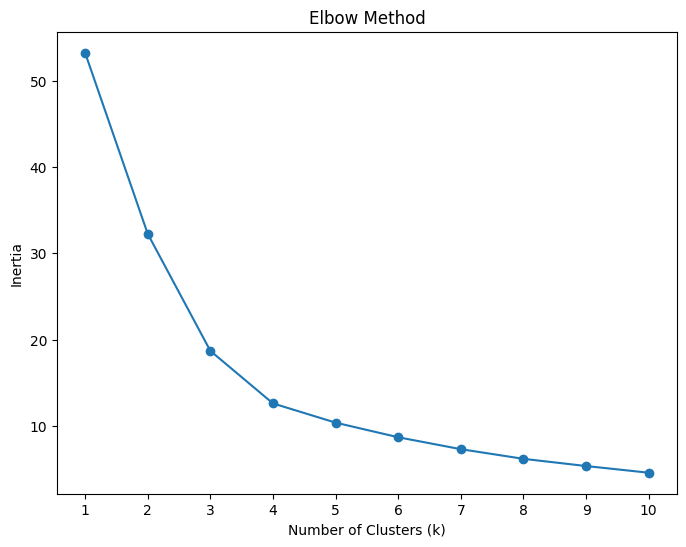

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

En el gráfico resultante, busca el punto en el que la curva muestra un "codo", es decir, el punto donde la disminución en la inercia comienza a desacelerarse. Ese valor de 'k' es una buena estimación del número óptimo de clusters para tus datos.

Recuerda que el método del codo es una heurística y puede no ser siempre completamente claro. En algunos casos, es posible que debas combinar este enfoque con otros métodos o conocimiento de dominio para tomar una decisión final sobre el número de clusters.

## **Coeficiente Silueta e Índice Davies-Bouldin con Python**

El coeficiente de silueta y el índice Davies-Bouldin son dos métricas utilizadas para evaluar la calidad de los clusters generados por algoritmos de clustering, como K-Means. Estas métricas proporcionan información sobre la cohesión interna de los clusters y la separación entre los clusters. Una puntuación más alta en el coeficiente de silueta y una puntuación más baja en el índice Davies-Bouldin indican una mejor calidad de los clusters.

Voy a explicarte cada una de estas métricas con ejemplos y sus respectivas gráficas en código Python.

**Coeficiente de Silueta**:

El coeficiente de silueta es una métrica que mide cuán similar es un objeto a su propio cluster en comparación con otros clusters. Puede tomar valores entre -1 y 1. Un valor alto indica que el objeto está bien clasificado en su cluster y separado de otros clusters.

A continuación, se muestra un ejemplo de cómo calcular el coeficiente de silueta en Python:

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

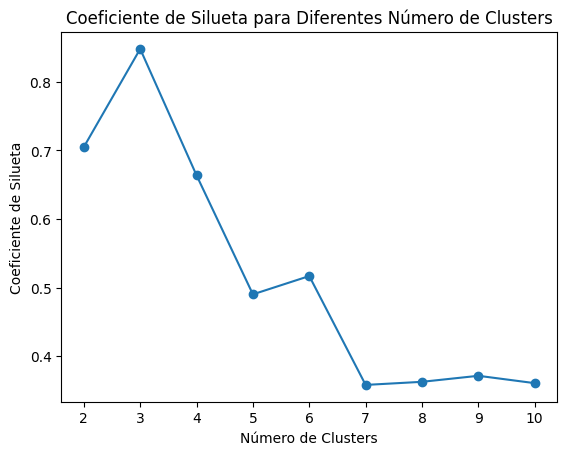

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el coeficiente de silueta para diferentes números de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de Silueta")
plt.title("Coeficiente de Silueta para Diferentes Número de Clusters")
plt.show()

**Índice Davies-Bouldin**:

El índice Davies-Bouldin mide la "bondad" de los clusters calculando la media de las razones de la distancia intra-cluster más cercana a la distancia inter-cluster más cercana. Cuanto más bajo sea el valor, mejor será la calidad del clustering.

Aquí tienes un ejemplo de cómo calcular el índice Davies-Bouldin en Python:

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

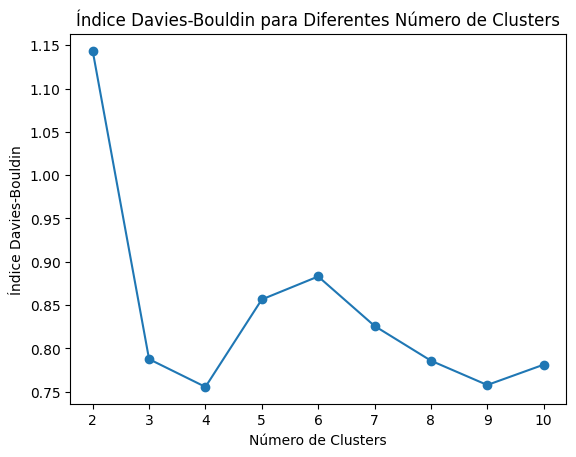

In [26]:
from sklearn.metrics import davies_bouldin_score

# Calcular el índice Davies-Bouldin para diferentes números de clusters
davies_bouldin_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Graficar el índice Davies-Bouldin para diferentes números de clusters
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("Índice Davies-Bouldin")
plt.title("Índice Davies-Bouldin para Diferentes Número de Clusters")
plt.show()

En ambos casos, puedes observar cómo cambian las métricas a medida que varías el número de clusters. Un pico en el coeficiente de silueta o un mínimo en el índice Davies-Bouldin puede ayudarte a determinar cuál es el número óptimo de clusters para tus datos.

## **Generative Adversarial Networks (GANs) / Redes Generativas Adversarias: Deep Learning**

Las Redes Generativas Adversarias (GANs) son un tipo de modelo en el campo del aprendizaje profundo que se utilizan para generar datos realistas, como imágenes, música, texto, entre otros. Las GANs fueron propuestas por Ian Goodfellow y sus colegas en 2014 y han demostrado ser una técnica poderosa para la generación de contenido sintético de alta calidad. La idea detrás de las GANs es enfrentar dos redes neuronales, el generador y el discriminador, en una competencia para mejorar la calidad de las muestras generadas.

Voy a proporcionarte una explicación detallada sobre las GANs junto con ejemplos y código en Python para que puedas comprender mejor cómo funcionan.

**Concepto Básico**:

Las GANs consisten en dos redes neuronales:

1. **Generador**: Esta red toma como entrada un vector de números aleatorios (ruido) y produce una muestra que intenta ser indistinguible de los datos reales. El objetivo del generador es aprender a mapear el ruido a datos realistas.

2. **Discriminador**: Esta red actúa como un clasificador binario. Toma una muestra y decide si es real (del conjunto de datos real) o falsa (producida por el generador). El objetivo del discriminador es aprender a distinguir entre muestras reales y generadas.

**Pasos de Entrenamiento**:

1. El generador crea una muestra falsa a partir del ruido.
2. El discriminador clasifica la muestra falsa del generador y las muestras reales del conjunto de datos.
3. El generador ajusta sus pesos para engañar al discriminador y hacer que clasifique la muestra falsa como real.
4. El discriminador ajusta sus pesos para mejorar su capacidad de distinguir entre muestras reales y falsas.
5. Repetir los pasos anteriores varias veces hasta que el generador genere muestras de alta calidad que sean difíciles de distinguir de las reales.

**Ejemplo de Generación de Imágenes**:

Vamos a ver un ejemplo simple de cómo generar imágenes de dígitos utilizando GANs con la biblioteca TensorFlow y Keras en Python:

2023-08-10 23:01:00.019228: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 23:01:04.741319: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 23:01:23.258526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2/2 [==============================] - 1s 27ms/step
Epoch: 1, Discriminator Loss: 0.7771584391593933, Generator Loss: 0.5614352226257324
2/2 [==============================] - 0s 17ms/step
Epoch: 2, Discriminator Loss: 0.8836774230003357, Generator Loss: 0.4348617196083069
2/2 [==============================] - 0s 11ms/step
Epoch: 3, Discriminator Loss: 0.9846147298812866, Generator Loss: 0.34447261691093445
2/2 [==============================] - 0s 15ms/step
Epoch: 4, Discriminator Loss: 1.0878144204616547, Generator Loss: 0.24878202378749847
2/2 [==============================] - 0s 19ms/step
Epoch: 5, Discriminator Loss: 1.2117915451526642, Generator Loss: 0.20632492005825043
2/2 [==============================] - 0s 24ms/step
Epoch: 6, Discriminator Loss: 1.32608762383461, Generator Loss: 0.16332317888736725
2/2 [==============================] - 0s 35ms/step
Epoch: 7, Discriminator Loss: 1.4343831539154053, Generator Loss: 0.12547484040260315
2/2 [==============================] -

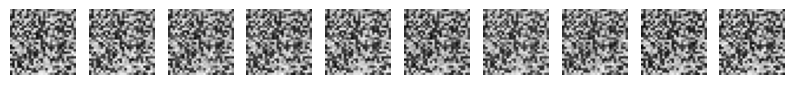

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

# Cargar y preprocesar el conjunto de datos MNIST
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0  # Normalizar los valores de píxeles

# Definir el generador
generator = Sequential([
    Dense(128, input_dim=100, activation='relu'),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28))
])

# Definir el discriminador
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Combinar el generador y el discriminador para formar la GAN
discriminator.trainable = False
gan = Sequential([generator, discriminator])

# Compilar los modelos
generator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar la GAN
epochs = 100
batch_size = 64

for epoch in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)

    real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

    discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))

    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    print(f"Epoch: {epoch+1}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# Generar imágenes
noise = np.random.normal(0, 1, (10, 100))
generated_images = generator.predict(noise)

# Mostrar imágenes generadas
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
plt.show()

Este es un ejemplo simplificado de GANs para la generación de imágenes de dígitos MNIST. En la práctica, las GANs se pueden ajustar y personalizar para generar una amplia variedad de tipos de datos y lograr resultados más impresionantes.

| **Inicio** | **atrás 19** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./19_Precision_Accuracy_Recall_F1.ipynb)|